In [1]:
import pandas as pd
from nsepy import get_history as gh
import datetime as dt

In [2]:
start = dt.datetime(2021,6,1)
end = dt.datetime(2022,1,28)
# stk_data = gh(symbol = 'TATACOFFEE', start=start, end=end)
stk_data = pd.read_csv("Tatacoffee13_21.csv", index_col='Date')

In [3]:
# stk_data = stk_data[["Open","High","Low","Close"]]
stk_data

,Open,High,Low,Close
Date,,,,
2013-01-01,1410.60,1427.90,1408.30,1415.10
2013-01-02,1421.00,1626.60,1416.15,1607.40
2013-01-03,1632.55,1673.90,1613.05,1626.20
2013-01-04,1627.75,1627.75,1574.60,1579.05
2013-01-07,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...
2021-12-22,202.90,207.80,201.35,205.00
2021-12-23,206.00,206.85,202.05,202.95
2021-12-24,203.90,203.90,199.35,201.00


In [4]:
column = "Close"

In [5]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1=Ms.fit_transform(stk_data[[column]])
print("len:",data1.shape)

len: (2225, 1)


In [6]:
training_size = round(len(data1)*0.95)
print("training_size-",training_size)
x_train = data1[:training_size]
x_test = data1[training_size:]
print("x_train-",x_train.shape)
print("x_test-",x_test.shape)
y_train = data1[:training_size]
y_test = data1[training_size:]
print("y_train-",y_train.shape)
print("y_test-",y_test.shape)

training_size- 2114
x_train- (2114, 1)
x_test- (111, 1)
y_train- (2114, 1)
y_test- (111, 1)


In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import numpy as np
orders = [(1,0,2),(1,0,1),(2,0,1),(2,0,2)]
from statsmodels.tsa.arima.model import ARIMA

for i in orders:
    #print(td)
    model = ARIMA(x_train,order=i)
    model_fit = model.fit()
    y_pred = model_fit.predict(len(x_train),len(data1)-1)
    
    from sklearn.metrics import r2_score
    mse = mean_squared_error(y_test, y_pred)
    #print(y_pred)

    print("Order={}".format(i))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("RMSE:", rmse)

    mape = mean_absolute_percentage_error(y_test, y_pred)
    print("MAPE:", mape)
    print("***********")

Order=(1, 0, 2)
RMSE: 0.01034875832333984
MAPE: 0.08148893033837626
***********
Order=(1, 0, 1)
RMSE: 0.010300523206285866
MAPE: 0.08106893389955336
***********
Order=(2, 0, 1)
RMSE: 0.010152121533216268
MAPE: 0.07980950949883067
***********
Order=(2, 0, 2)
RMSE: 0.010800332931539699
MAPE: 0.0893017231026469
***********


In [9]:
len(y_pred)

111

In [10]:
order=(2, 0, 1)
model = ARIMA(x_train,order=order)
model_fit = model.fit()
y_pred = model_fit.predict(len(x_train),len(data1)-1)
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test,y_pred)
print("Order={}".format(order))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:", mape)

Order=(2, 0, 1)
RMSE: 0.010152121533216268
MAPE: 0.07980950949883067


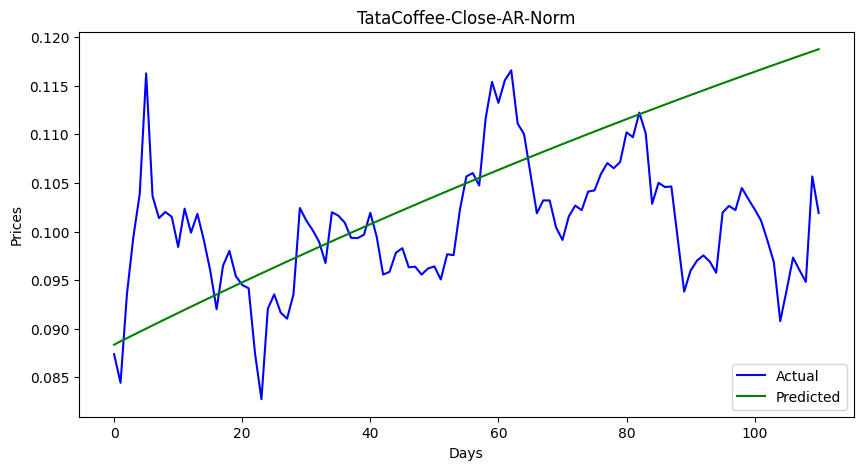

In [11]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-Close-AR-Norm","Days","Prices")

In [12]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori = Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA = conversionSingle(actual_stock_price_test_ori,[column])

In [13]:
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori = Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriA = conversionSingle(predicted_stock_price_test_ori,[column])

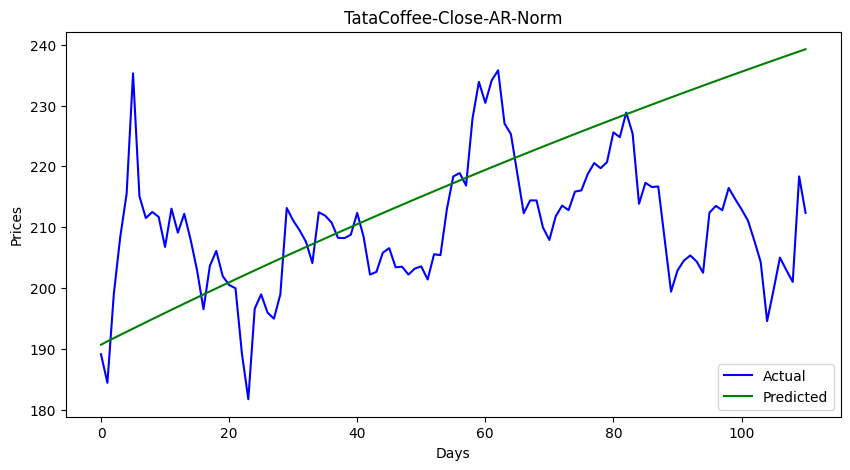

In [14]:
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriA,"Actual","Predicted","TataCoffee-Close-AR-Norm","Days","Prices")

In [15]:
forecast = model_fit.predict(len(data1),len(data1)+3)
forecast

array([0.11898694, 0.11921361, 0.11943951, 0.11966465])

In [16]:
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori = Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriA = conversionSingle(forecast_stock_price_test_ori,["Closefore"])
forecast_stock_price_test_oriA

,Closefore
0,239.636317
1,239.99872
2,240.359893
3,240.719842


In [17]:
forecast_stock_price_test_oriA.to_csv("CloseARMA.csv",index=False)